I found one epsilon! Mode 1: Epsilon = 0.9999999767751432
0.9999999999999999
I found one epsilon! Mode 2: Epsilon = 2.9999994019628504
0.9999999999999998
I found one epsilon! Mode 3: Epsilon = 4.999989531433677
0.9999999999999999
I found one epsilon! Mode 4: Epsilon = 6.999883196747399
1.0
I found one epsilon! Mode 5: Epsilon = 8.99906074801693
1.0


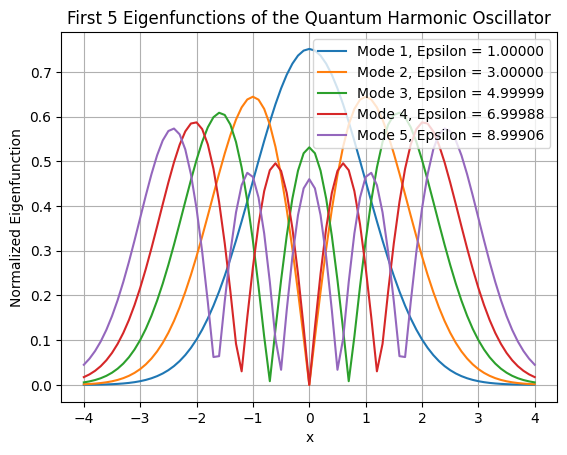

Found Eigenvalues (A2): [0.99999998 2.9999994  4.99998953 6.9998832  8.99906075]
Eigenfunctions Matrix (A1):
[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588478e-02
  4.50516634e-02]
 [3.76940965e-04 2.08377489e-03 7.88695717e-03 2.35399844e-02
  5.86293757e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583009e-02
  7.58484043e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281013e-02
  9.71899167e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048300e-02
  1.23080911e-01]
 [1.64382706e-03 8.13893182e-03 2.73391697e-02 7.15653865e-02
  1.53831247e-01]
 [2.32055909e-03 1.11600069e-02 3.63163649e-02 9.17795064e-02
  1.89559870e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171083e-01
  2.30113256e-01]
 [4.48904553e-03 2.03165046e-02 6.18486349e-02 1.45069155e-01
  2.74981570e-01]
 [6.15097107e-03 2.69674234e-02 7.92584569e-02 1.78649429e-01
  3.23220561e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868662e-01
  3.73389602e-01]
 [1.1207519

In [1]:
import numpy as np # type: ignore
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# HW 3 - Part (a)

# Define the system of ODEs: dy1/dx = y2, dy2/dx = (x^2 - epsilon) * y1
def shoot(y, x, epsilon):
    '''y[0] is the eigenfunction, y[1] is the first derivative of it'''
    return [y[1], (K * x**2 - epsilon) * y[0]]


# Define the x-domain and initial conditions
L = 4  # Boundary for x
K = 1
x_span = np.linspace(-L, L, 81)  # Grid points in x-domain  # Initial conditions: phi(-L) = 0, phi'(-L) = 1

# Create storage for eigenfunctions and eigenvalues
A1 = np.zeros((len(x_span), 5))  # Eigenfunctions matrix
A2 = np.zeros(5)  # Eigenvalues vector

# Initial guess for epsilon
epsilon_start = 0.1

# Loop over the first 5 modes
for modes in range(1, 6):
    epsilon = epsilon_start
    delta_epsilon = 0.2  # Initial step size

    # Convergence loop for each mode
    for i in range(1000):
        alpha = K * L**2 - epsilon
        A = np.sqrt(alpha)
        y0 = [1, A]

        sol = odeint(shoot, y0, x_span, args=(epsilon,))
        boundary_value = sol[-1, 0]  # Value at the boundary

        if abs(sol[-1, 1] + np.sqrt(alpha) * boundary_value) < 1e-4:  # Check convergence
            print(f"I found one epsilon! Mode {modes}: Epsilon = {epsilon}")
            A2[modes - 1] = epsilon  # Store the found eigenvalue

            # Normalize the eigenfunction
            norm = np.trapezoid(sol[:, 0] ** 2, x_span)  # Normalization factor
            A1[:, modes - 1] = abs(sol[:, 0] / np.sqrt(norm))
            check_norm = np.trapezoid(A1[:, modes - 1] ** 2, x_span)
            print(check_norm)

            # Plot the normalized eigenfunction
            plt.plot(x_span, A1[:, modes - 1],
                     label=f"Mode {modes}, Epsilon = {epsilon:.5f}")
            break  # Exit convergence loop

        # Adjust epsilon based on overshoot/undershoot behavior
        if (-1) ** (modes + 1) * (sol[-1, 1] + np.sqrt(alpha) * boundary_value) > 0:
            epsilon += delta_epsilon  # Increase epsilon
        else:
            epsilon -= delta_epsilon / 2  # Decrease epsilon
            delta_epsilon /= 2  # Reduce step size

    # Increment epsilon for the next mode
    epsilon_start = epsilon + 0.2

# Show the plot
plt.xlabel('x')
plt.ylabel('Normalized Eigenfunction')
plt.title('First 5 Eigenfunctions of the Quantum Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

# Print the found eigenvalues and eigenfunctions
print("Found Eigenvalues (A2):", A2)
print("Eigenfunctions Matrix (A1):")
print(A1)


In [2]:
# HW3 - part(b)

# Set up the domain
L = 4
N = 81  # number of points including boundaries
x_span = np.linspace(-L, L, N)
delta_x = 0.1

# Initialize matrices
A_1 = np.zeros((N-2, N-2))

# Build the diagonal matrix with three components A1 + A2 + A3
# A1: main diagonal and off-diagonals
for j in range(N-2):
    # Main diagonal: -2 - x^2 * dx^2
    A_1[j,j] = -2 - x_span[j+1]**2 * delta_x**2
    
    # Upper diagonal (ones)
    if j < N-3:
        A_1[j,j+1] = 1
        
    # Lower diagonal (ones)
    if j > 0:
        A_1[j,j-1] = 1


# A2: Forward difference for left boundary
A_2 = np.zeros((N-2, N-2))
A_2[0,0] = 4/3
A_2[0,1] = -1/3

# A3: Backward difference for right boundary
A_3 = np.zeros((N-2, N-2))
A_3[-1,-2] = -1/3
A_3[-1,-1] = 4/3

A_b = A_1 + A_2 + A_3
print(A_b)

[[-0.81876667  0.66666667  0.         ...  0.          0.
   0.        ]
 [ 1.         -2.1444      1.         ...  0.          0.
   0.        ]
 [ 0.          1.         -2.1369     ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -2.1369      1.
   0.        ]
 [ 0.          0.          0.         ...  1.         -2.1444
   1.        ]
 [ 0.          0.          0.         ...  0.          0.66666667
  -0.81876667]]


In [3]:
from scipy.sparse.linalg import eigs

eigenvalues, eigenfunctions = eigs(-A_b, k=5, which='SR')

# Compute phi_0 and phi_N as specified
phi_0 = (4 / 3) * eigenfunctions[0, :] - (1 / 3) * eigenfunctions[1, :]
phi_N = (4 / 3) * eigenfunctions[-1, :] - (1 / 3) * eigenfunctions[-2, :]

# Use vstack to add phi_0 and phi_N as the first and last columns
eigenfunctions = np.vstack([phi_0, eigenfunctions, phi_N])

# # Sort eigenvalues and eigenfunctions in increasing order
# idx = np.argsort(eigenvalues)  # Indices of sorted eigenvalues
# eigenvalues = eigenvalues[idx]  # Sorted eigenvalues
# eigenfunctions = eigenfunctions[:, idx]  # Corresponding sorted eigenfunctions

# Select the first five eigenvalues and corresponding eigenfunctions
eigenvalues = eigenvalues[:5]/(delta_x**2)
eigenfunctions = eigenfunctions[:, :5]
# print(eigenfunctions[2,3])
# print(eigenvalues)
for i in range(5):
    norm = np.sqrt(np.sum(np.abs(eigenfunctions[:, i])**2) * delta_x)
    eigenfunctions[:, i] /= norm

A3 = np.abs(eigenfunctions)
# print(A3[2,3])
A4 = np.real(eigenvalues)

# Print the eigenfunctions
print("Eigenfunctions are:")
print(A3)

print("Eigenvalues are:")
print(A4)



Eigenfunctions are:
[[5.25330691e-04 2.98456619e-03 1.16813051e-02 3.63660896e-02
  9.51526920e-02]
 [5.65512097e-04 3.17867451e-03 1.23102735e-02 3.79266996e-02
  9.82268992e-02]
 [6.86056315e-04 3.76099946e-03 1.41971787e-02 4.26085296e-02
  1.07449521e-01]
 [8.98810800e-04 4.77370163e-03 1.74255176e-02 5.04687903e-02
  1.22570477e-01]
 [1.22563001e-03 6.29686341e-03 2.21696314e-02 6.17153106e-02
  1.43500538e-01]
 [1.69904224e-03 8.44739183e-03 2.86803531e-02 7.66521667e-02
  1.70184109e-01]
 [2.36360737e-03 1.13795710e-02 3.72728649e-02 9.56282940e-02
  2.02482735e-01]
 [3.27778424e-03 1.52862012e-02 4.83136797e-02 1.18983826e-01
  2.40064945e-01]
 [4.51615451e-03 2.03993958e-02 6.22043221e-02 1.46991162e-01
  2.82302975e-01]
 [6.17184575e-03 2.69901515e-02 7.93598164e-02 1.79789840e-01
  3.28181019e-01]
 [8.35897157e-03 3.53658094e-02 1.00180618e-01 2.17316291e-01
  3.76223089e-01]
 [1.12148675e-02 4.58645338e-02 1.25017253e-01 2.59231687e-01
  4.24451013e-01]
 [1.49018553e-02 5.8

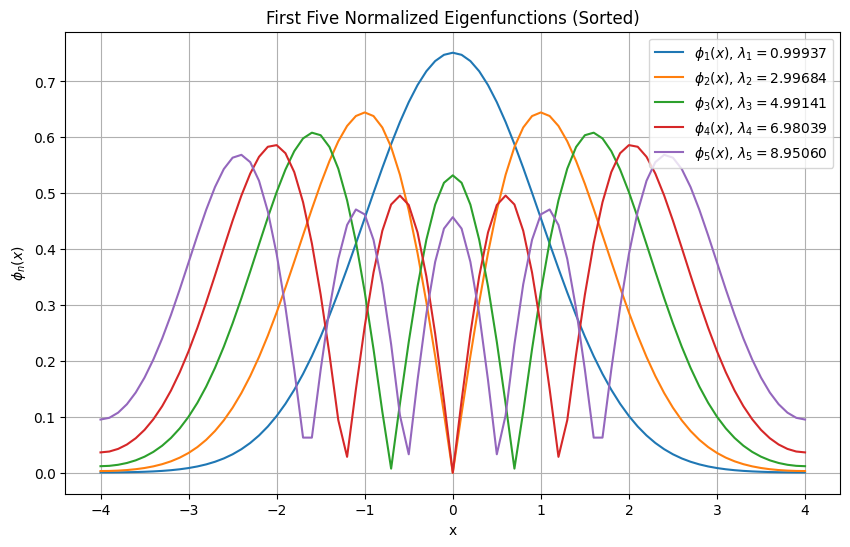

In [4]:
# Plotting the first five eigenfunctions

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x_span, A3[:, i], label=f"$\phi_{i+1}(x)$, $\lambda_{i+1}={A4[i]:.5f}$")

plt.title("First Five Normalized Eigenfunctions (Sorted)")
plt.xlabel("x")
plt.ylabel("$\phi_n(x)$")
plt.legend()
plt.grid(True)
plt.show()

Eigenvalues for gamma = 0.05: [1.01293457 2.92141602]
Eigenvalues for gamma = -0.05: [0.97403564 2.89311768]


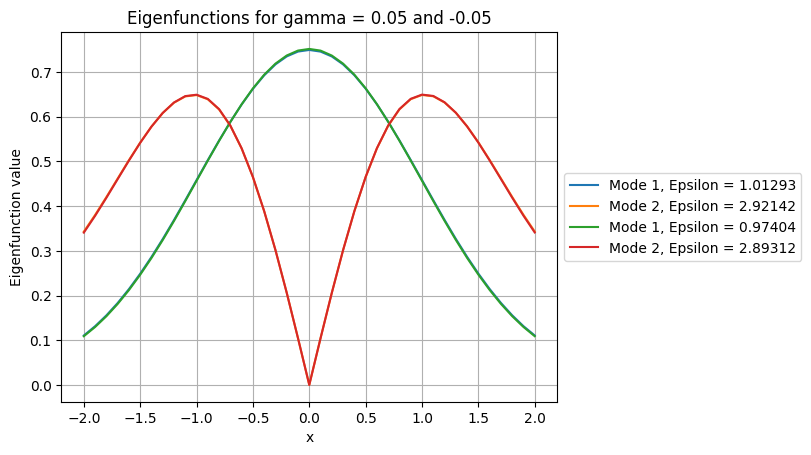

[[1.09044209e-01 3.40831266e-01]
 [1.29683410e-01 3.78397802e-01]
 [1.53727440e-01 4.18701547e-01]
 [1.81254967e-01 4.60405741e-01]
 [2.12254747e-01 5.01965901e-01]
 [2.46605031e-01 5.41724610e-01]
 [2.84073566e-01 5.77911518e-01]
 [3.24317592e-01 6.08643342e-01]
 [3.66980160e-01 6.32044795e-01]
 [4.11405247e-01 6.46263074e-01]
 [4.56690634e-01 6.49395781e-01]
 [5.01919651e-01 6.40004538e-01]
 [5.46161234e-01 6.17131567e-01]
 [5.88469924e-01 5.80299687e-01]
 [6.27885863e-01 5.29512318e-01]
 [6.63434800e-01 4.65306016e-01]
 [6.94128087e-01 3.88856904e-01]
 [7.18962697e-01 3.01798104e-01]
 [7.37113103e-01 2.06203083e-01]
 [7.48158659e-01 1.04586268e-01]
 [7.51840134e-01 9.69534649e-05]
 [7.48084396e-01 1.04612276e-01]
 [7.37004409e-01 2.06124264e-01]
 [7.18899237e-01 3.01723761e-01]
 [6.94254042e-01 3.88869401e-01]
 [6.63740082e-01 4.65443469e-01]
 [6.28214716e-01 5.29751904e-01]
 [5.88711451e-01 5.80556108e-01]
 [5.46296323e-01 6.17356930e-01]
 [5.01994838e-01 6.40213836e-01]
 [4.567825

In [5]:
from scipy.integrate import solve_ivp

# HW3 - part(c)

# Define the system of ODEs for part (c)
def shoot_nonlinear(x, y, epsilon, gamma):
    '''y[0] is the eigenfunction, y[1] is the first derivative of it'''
    return [y[1], (gamma * abs(y[0])**2 + K * x**2 - epsilon) * y[0]]

N_points = 41
x_span_c = np.linspace(-L, L, N_points)

# Storage arrays
A5 = np.zeros((N_points, 2))  # Eigenfunctions for gamma = 0.05
A6 = np.zeros(2)              # Eigenvalues for gamma = 0.05
A7 = np.zeros((N_points, 2))  # Eigenfunctions for gamma = -0.05
A8 = np.zeros(2)              # Eigenvalues for gamma = -0.05


def find_modes(gamma):
    L = 2  # Boundary for x
    K = 1
    N_points = 41  # Number of points for x_span
    x_span_c = np.linspace(-L, L, N_points)
    
    eigenfunctions = np.zeros((N_points, 2)) # Use x_span_c instead of x_span
    eigenvalues = np.zeros(2)
    epsilon_start = 0.1
    
    initial_value = 1e-6

    # Loop over the first 2 modes
    for modes in range(1, 3):
        # Convergence loop for each mode
        delta_initial = 0.01

        for k in range(100):
            epsilon = epsilon_start
            delta_epsilon = 0.2  # Initial step size

            for i in range(100):
                alpha_c = K * L**2 - epsilon
                # print(alpha_c)

                A_c = np.sqrt(alpha_c)
                y0_c = [initial_value, A_c * initial_value]


                sol_ivp = solve_ivp(lambda x, y: shoot_nonlinear(x, y, epsilon, gamma), [x_span_c[0], x_span_c[-1]], y0_c, t_eval=x_span_c)

                sol = sol_ivp.y.T  # Transpose to match expected shape
                x_c = sol_ivp.t     # Assign x-values
                boundary_value_c = sol[-1, 0]  # Value at the boundary


                if abs(sol[-1, 1] + A_c * boundary_value_c) < 1e-4:  # Check convergence
                    #print(f"I found one epsilon! Mode {modes}: Epsilon = {epsilon}")
                    break  # Exit convergence loop

                # Adjust epsilon based on overshoot/undershoot behavior
                if (-1) ** (modes + 1) * (sol[-1, 1] + A_c * boundary_value_c) > 0:
                    epsilon += delta_epsilon  # Increase epsilon
                else:
                    epsilon -= delta_epsilon / 2  # Decrease epsilon
                    delta_epsilon /= 2  # Reduce step size

            # Normalize the eigenfunction
            if abs(np.trapezoid(sol[:, 0] ** 2, x=x_c) - 1) < 1e-4:
                break

            if np.trapezoid(sol[:, 0] ** 2, x=x_c) < 1:
                initial_value += delta_initial
            else:
                initial_value -= delta_initial
                delta_initial /= 2

            # Increment epsilon for the next mode
            epsilon_start = epsilon + 0.01

        # Normalize the eigenfunction using trapezoid rule
        norm_c = np.trapezoid(sol[:, 0] ** 2, x=x_span_c)
        eigenfunctions[:, modes - 1] = abs(sol[:, 0] / np.sqrt(norm_c))
        eigenvalues[modes - 1] = epsilon  # Store the found eigenvalue

        # Plot the normalized eigenfunction
        plt.plot(x_span_c, eigenfunctions[:, modes - 1], label=f"Mode {modes}, Epsilon = {epsilon:.5f}")

    return eigenvalues, eigenfunctions

# Solve for gamma = 0.05
A6, A5 = find_modes(0.05)

# Solve for gamma = -0.05
A8, A7 = find_modes(-0.05)

# Print results
print("Eigenvalues for gamma = 0.05:", A6)
print("Eigenvalues for gamma = -0.05:", A8)

plt.grid(True)
plt.title("Eigenfunctions for gamma = 0.05 and -0.05")
plt.xlabel("x")
plt.ylabel("Eigenfunction value")
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print(A7)
print(A8)


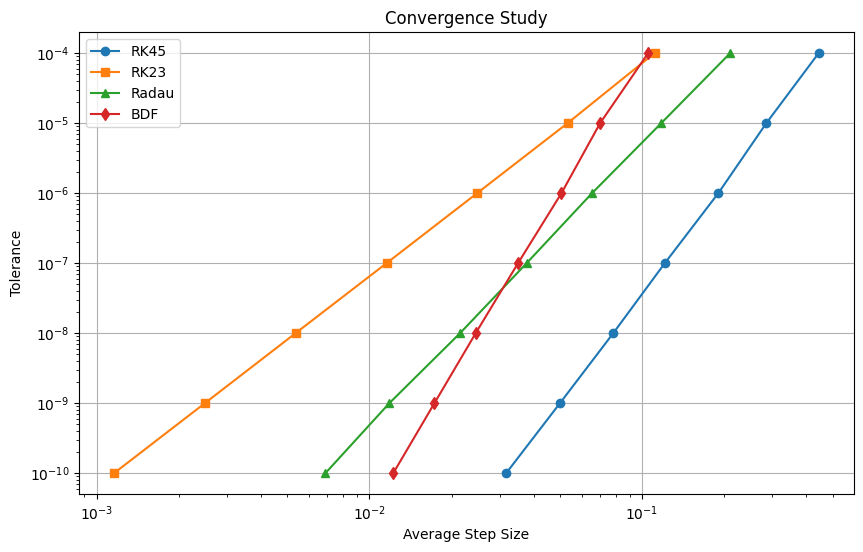

Slopes of RK45, RK23, Radau and BDF respectively (A9):
[5.24466756 3.01909953 4.03819927 6.45751261]


In [6]:
# HW3 - part(d)

# Define the system of ODEs for part (d)
def ode_system(x, y, epsilon):
    '''y[0] is the eigenfunction, y[1] is the first derivative of it'''
    return [y[1], (K * x**2 - epsilon) * y[0]]

# Define the x-domain and initial conditions
L = 2  # Boundary for x
K = 1
epsilon = 1
gamma = 0
x_span = [-L, L]
y0 = [1, np.sqrt(K * L**2 - epsilon)]

# Define tolerances
tolerances = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Function to perform convergence study
def convergence_study(method):
    avg_step_sizes = []
    for tol in tolerances:
        sol = solve_ivp(ode_system, x_span, y0, args=(epsilon,), method=method, atol=tol, rtol=tol)
        step_sizes = np.diff(sol.t)
        avg_step_size = np.mean(step_sizes)
        avg_step_sizes.append(avg_step_size)
    return avg_step_sizes

# Perform convergence study for RK45 and RK23
avg_step_sizes_rk45 = convergence_study('RK45')
avg_step_sizes_rk23 = convergence_study('RK23')

# Perform convergence study for Radau and BDF
avg_step_sizes_radau = convergence_study('Radau')
avg_step_sizes_bdf = convergence_study('BDF')

# Plot the results on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(avg_step_sizes_rk45, tolerances, 'o-', label='RK45')
plt.loglog(avg_step_sizes_rk23, tolerances, 's-', label='RK23')
plt.loglog(avg_step_sizes_radau, tolerances, '^-', label='Radau')
plt.loglog(avg_step_sizes_bdf, tolerances, 'd-', label='BDF')
plt.xlabel('Average Step Size')
plt.ylabel('Tolerance')
plt.title('Convergence Study')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the slopes using polyfit
slope_rk45 = np.polyfit(np.log10(avg_step_sizes_rk45), np.log10(tolerances), 1)[0]
slope_rk23 = np.polyfit(np.log10(avg_step_sizes_rk23), np.log10(tolerances), 1)[0]
slope_radau = np.polyfit(np.log10(avg_step_sizes_radau), np.log10(tolerances), 1)[0]
slope_bdf = np.polyfit(np.log10(avg_step_sizes_bdf), np.log10(tolerances), 1)[0]

# Save the slopes in a 4x1 vector
A9 = np.array([slope_rk45, slope_rk23, slope_radau, slope_bdf])

# Print the slopes
print("Slopes of RK45, RK23, Radau and BDF respectively (A9):")
print(A9)


In [7]:
# HW3 - part(e)
# Repeat part (a) using solve_ivp instead of odeint

L = 4
x_span = np.linspace(-L, L, 81) 


# Define the system of ODEs for solve_ivp
def shoot_ivp(x, y, epsilon):
    '''y[0] is the eigenfunction, y[1] is the first derivative of it'''
    return [y[1], (K * x**2 - epsilon) * y[0]]

# Create storage for eigenfunctions and eigenvalues
A1_ivp = np.zeros((len(x_span), 5))  # Eigenfunctions matrix
A2_ivp = np.zeros(5)  # Eigenvalues vector

# Initial guess for epsilon
epsilon_start = 0.1

# Loop over the first 5 modes
for modes in range(1, 6):
    epsilon = epsilon_start
    delta_epsilon = 0.2  # Initial step size

    # Convergence loop for each mode
    for i in range(1000):
        alpha = K * L**2 - epsilon
        A = np.sqrt(alpha)
        y0 = [1, A]

        sol_ivp = solve_ivp(lambda x, y: shoot_ivp(x, y, epsilon), [x_span[0], x_span[-1]], y0, t_eval=x_span)
        sol = sol_ivp.y.T  # Transpose to match expected shape
        boundary_value = sol[-1, 0]  # Value at the boundary

        if abs(sol[-1, 1] + np.sqrt(alpha) * boundary_value) < 1e-4:  # Check convergence
            A2_ivp[modes - 1] = epsilon  # Store the found eigenvalue

            # Normalize the eigenfunction
            norm = np.trapezoid(sol[:, 0] ** 2, x_span)  # Normalization factor
            A1_ivp[:, modes - 1] = abs(sol[:, 0] / np.sqrt(norm))
            break  # Exit convergence loop

        # Adjust epsilon based on overshoot/undershoot behavior
        if (-1) ** (modes + 1) * (sol[-1, 1] + np.sqrt(alpha) * boundary_value) > 0:
            epsilon += delta_epsilon  # Increase epsilon
        else:
            epsilon -= delta_epsilon / 2  # Decrease epsilon
            delta_epsilon /= 2  # Reduce step size

    # Increment epsilon for the next mode
    epsilon_start = epsilon + 0.2

# Print the found eigenvalues and eigenfunctions
print("Found Eigenvalues (A2_ivp):", A2_ivp)
print("Eigenfunctions Matrix (A1_ivp):")
print(A1_ivp)



Found Eigenvalues (A2_ivp): [0.99973579 2.9990026  4.99846305 6.997581   8.99625425]
Eigenfunctions Matrix (A1_ivp):
[[2.56023908e-04 1.45261190e-03 5.65783873e-03 1.74247033e-02
  4.49716541e-02]
 [3.76704668e-04 2.08090003e-03 7.87406355e-03 2.34942195e-02
  5.85268010e-02]
 [5.51333049e-04 2.96477386e-03 1.08973736e-02 3.14957084e-02
  7.57119110e-02]
 [8.00736395e-04 4.19027275e-03 1.49549870e-02 4.18498818e-02
  9.70292818e-02]
 [1.15230933e-03 5.86545728e-03 2.03156030e-02 5.50069969e-02
  1.22892293e-01]
 [1.64247145e-03 8.12654770e-03 2.72920161e-02 7.14286433e-02
  1.53600245e-01]
 [2.31906176e-03 1.11444492e-02 3.62571649e-02 9.16072529e-02
  1.89280537e-01]
 [3.24162496e-03 1.51206884e-02 4.76086454e-02 1.15975906e-01
  2.29811529e-01]
 [4.48522818e-03 2.02874785e-02 6.17600351e-02 1.44840204e-01
  2.74657391e-01]
 [6.14601739e-03 2.69273187e-02 7.91314209e-02 1.78373546e-01
  3.22845862e-01]
 [8.33948492e-03 3.53568208e-02 1.00165628e-01 2.16551308e-01
  3.72969027e-01]
 [1

Relative Percent Error for Eigenvalues in part (a):
[0.02642089 0.0332466  0.03073891 0.03455712 0.04161945]
Relative Percent Error for Eigenvalues in part (b):
[0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]


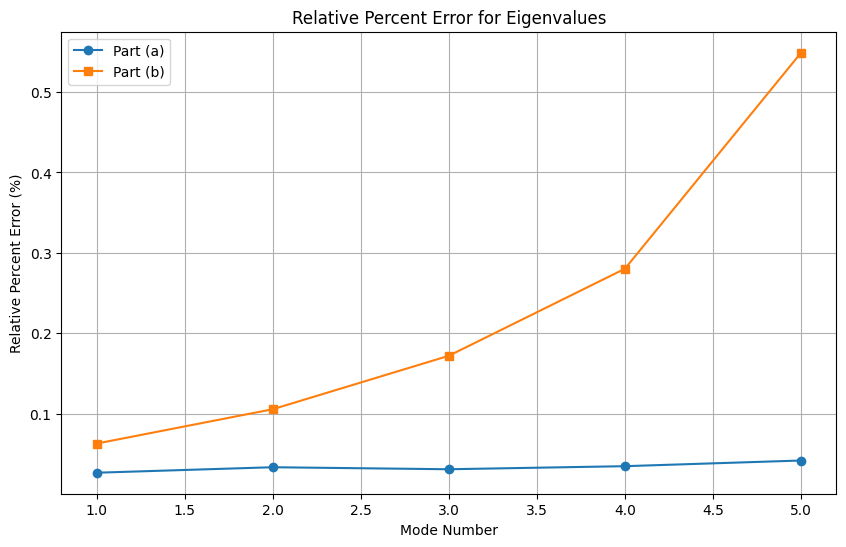

In [8]:
exact_eigenvalues = np.arange(1, 6) * 2 - 1

# Calculate the relative percent error for the eigenvalues in A2_ivp
relative_error_eigenvalues_A2 = 100 * np.abs((A2_ivp - exact_eigenvalues) / exact_eigenvalues)
A11 = relative_error_eigenvalues_A2

# Print the relative percent error for the eigenvalues in A2_ivp
print("Relative Percent Error for Eigenvalues in part (a):")
print(A11)

# Calculate the relative percent error for the eigenvalues in A4
relative_error_eigenvalues_A4 = 100 * np.abs((A4 - exact_eigenvalues) / exact_eigenvalues)
A13 = relative_error_eigenvalues_A4

# Print the relative percent error for the eigenvalues in A4
print("Relative Percent Error for Eigenvalues in part (b):")
print(A13)

#Plot the error
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), A11, 'o-', label='Part (a)')
plt.plot(range(1, 6), A13, 's-', label='Part (b)')
plt.xlabel('Mode Number')
plt.ylabel('Relative Percent Error (%)')
plt.title('Relative Percent Error for Eigenvalues')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# Define the exact eigenfunction for a given mode j
def exact_eigenfunction(x, j):
    """Compute the exact eigenfunction for the j-th mode."""
    if j == 0:
        h_j = 1
    elif j == 1:
        h_j = 2 * x
    elif j == 2:
        h_j = 4 * x**2 - 2
    elif j == 3:
        h_j = 8 * x**3 - 12 * x
    elif j == 4:
        h_j = 16 * x**4 - 48 * x**2 + 12
    else:
        raise ValueError("Mode j out of range (0-4)")

    norm_factor = np.sqrt(factorial(j) * 2**j * np.sqrt(np.pi))
    phi_j = np.exp(-x**2 / 2) * h_j / norm_factor
    return phi_j

Relative Percent Error for Eigenfunctions in part (a):
[4.57692814e-08 1.72430946e-07 2.47861359e-07 4.35421341e-07
 1.96490935e-06]
Relative Percent Error for Eigenfunctions in part (b):
[2.33908575e-07 2.39720209e-06 1.81274628e-05 1.53036537e-04
 1.24175015e-03]


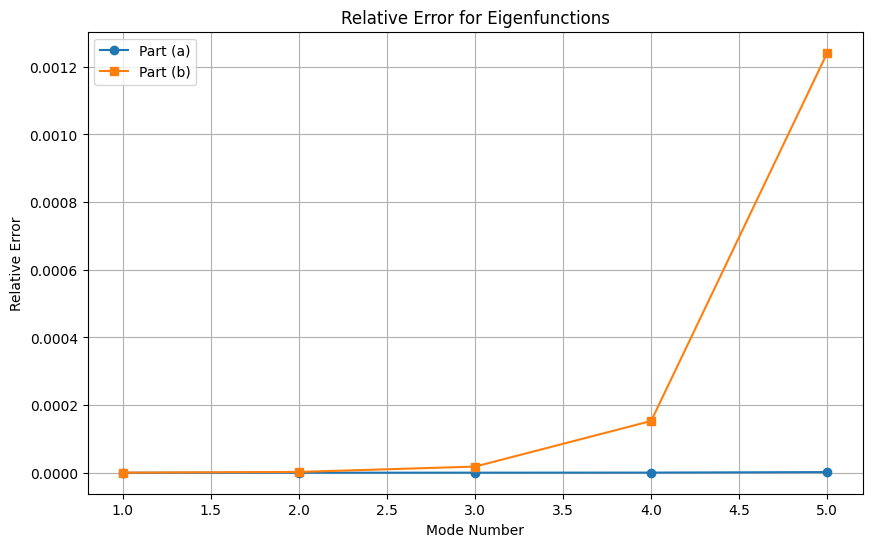

In [10]:

# Compute the exact eigenfunctions for the first 5 modes
exact_eigenfunctions = np.zeros_like(A1_ivp)  # Same shape as A1 (81 x 5)
x_span_array = np.array(x_span)  # Convert x_span to a NumPy array
for j in range(5):
    exact_eigenfunctions[:, j] = exact_eigenfunction(x_span_array, j)

def compute_relative_error(eigenfunctions, exact_eigenfunctions, x_span):
    """Compute the relative percent error for the eigenfunctions."""
    relative_error = np.zeros(5)
    for j in range(5):
        error = np.trapezoid((np.abs(eigenfunctions[:, j]) - np.abs(exact_eigenfunctions[:, j]))**2, x=x_span)
        relative_error[j] = error
    return relative_error

# Compute the relative percent error for the eigenfunctions in A1_ivp
A10 = compute_relative_error(A1_ivp, exact_eigenfunctions, x_span)

# Print the relative percent error for the eigenfunctions in A1_ivp
print("Relative Percent Error for Eigenfunctions in part (a):")
print(A10)

# Compute the relative percent error for the eigenfunctions in A3
A12 = compute_relative_error(A3, exact_eigenfunctions, x_span)

# Print the relative percent error for the eigenfunctions in A3
print("Relative Percent Error for Eigenfunctions in part (b):")
print(A12)


# Plot the relative percent error for the eigenfunctions in A1_ivp and A3
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), A10, 'o-', label='Part (a)')
plt.plot(range(1, 6), A12, 's-', label='Part (b)')
plt.xlabel('Mode Number')
plt.ylabel('Relative Error')
plt.title('Relative Error for Eigenfunctions')
plt.legend()
plt.grid(True)
plt.show()

